In [4]:
pip install lifelines

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import lifelines
from lifelines import KaplanMeierFitter
from lifelines.utils import datetimes_to_durations

In [54]:
dataframe = pd.read_csv("businesslicense.csv", engine = 'python')
dataframe.head()

,Category,Licence No.,Operating Name,Issued,Client Name,Business Phone,Business Phone Ext.,Licence Address Line 1,Licence Address Line 2,Licence Address Line 3,Conditions,Free Form Conditions Line 1,Free Form Conditions Line 2,Plate No.,Endorsements,Cancel Date
0,PRIVATE TRANSPORTATION COMPANY,B02-4741962,TAXIFY,18-Jan-18,TAXIFY CANADA INC,NaN,NaN,"35 OAK ST, #304","TORONTO, ON",M9N 1A1,TAXIFY;,NaN,NaN,NaN,PRIVATE TRANSPORTATION COMPANY;,07-Dec-18
1,PRIVATE TRANSPORTATION COMPANY,B02-4728645,INSTARYDE,08-Sep-17,INSTARYDE INC,NaN,NaN,425 ALNESS ST,"TORONTO, ON",M3J 2T8,INSTARYDE;,NaN,NaN,NaN,PRIVATE TRANSPORTATION COMPANY;,10-Dec-18
2,PRIVATE TRANSPORTATION COMPANY,B02-4653451,UBER CANADA,16-Aug-16,UBER CANADA INC,NaN,NaN,"121 BLOOR ST E, #1600","TORONTO, ON",M4W 3M5,MAILING ADDRESS ONLY; MUST COMPLY WITH CITY/ZO...,NaN,NaN,NaN,PRIVATE TRANSPORTATION COMPANY;,NaN
3,PRIVATE TRANSPORTATION COMPANY,B02-4691773,FACEDRIVE,04-Apr-17,FACEDRIVE INC,NaN,NaN,"44 EAST BEAVER CREEK RD, #16","RICHMOND HILL, ON",L4B 1G8,FACEDRIVE;,NaN,NaN,NaN,PRIVATE TRANSPORTATION COMPANY;,NaN
4,PRIVATE TRANSPORTATION COMPANY,B02-4714142,RIDEIN,18-May-17,RIDE INC,4.162314e+09,NaN,379 BERING AVE,"TORONTO, ON",M8Z 3B1,RIDEIN;,NaN,NaN,NaN,PRIVATE TRANSPORTATION COMPANY;,NaN


In [55]:
# Checking the amount of licenses with null information
#Based on this information, there are currently 39693 businesses still oeprating in the city of Toronto
print(dataframe.isnull().sum()) 

Category                            0
Licence No.                         0
Operating Name                  29017
Issued                              0
Client Name                         0
Business Phone                 136044
Business Phone Ext.            156487
Licence Address Line 1          27393
Licence Address Line 2          27393
Licence Address Line 3             66
Conditions                      80164
Free Form Conditions Line 1    110403
Free Form Conditions Line 2    145069
Plate No.                      135302
Endorsements                        0
Cancel Date                     39693
dtype: int64


In [56]:
print(dataframe['Conditions'].value_counts())


SEATING CAPACITY OVER 30;                                                                                                                                                                                                         14312
SEATING CAPACITY UNDER 40;                                                                                                                                                                                                        13171
NO SEATING ACCOMMODATION;                                                                                                                                                                                                          8141
SHARED ADDRESS;                                                                                                                                                                                                                    4448
MAILING ADDRESS ONLY; MUST COMPLY WITH CITY/ZONING BY-LAWS;             

In [57]:
def year_calculation(s):
    if s is np.nan:
        return s
    date, month, twodigit = s.split("-")
    if int(twodigit) > 45:
        return "-".join([date,month, '19' + str(twodigit)])
    else:
        return "-".join([date,month, '20' + str(twodigit)])

In [58]:
dataframe['Cancel Date'] = dataframe['Cancel Date'].map(year_calculation)


In [59]:
dataframe['Issued'] = dataframe['Issued'].map(year_calculation)

In [60]:
T,E = datetimes_to_durations(dataframe['Issued'],dataframe['Cancel Date'], na_values = ['NaN', np.nan])

C:\Users\iyanu\anaconda3\envs\myend\lib\site-packages\lifelines\utils\__init__.py:685: UserWarning: Warning: some values of start_times are after end_times.

  warnings.warn("Warning: some values of start_times are after end_times.\n", UserWarning)


In [61]:
# T is the amount of time (in days) the business was operating till the last data update
# E is a boolean for the business being alive or dead

In [74]:
print (T)


[ 323.  458. 1707. ...  460.  266.  266.]


In [75]:
print (E)

[ True  True False ... False False False]


In [76]:
E = E[T>0]
T = T[T>0]

In [77]:
kmf = KaplanMeierFitter()

In [78]:
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 157650 total observations, 39693 right-censored observations>

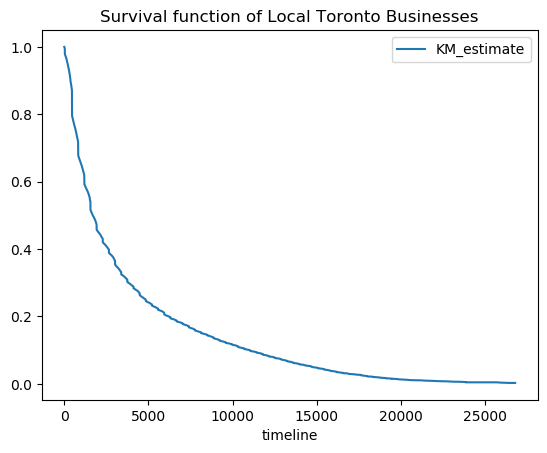

In [79]:
kmf.survival_function_.plot()
plt.title('Survival function of Local Toronto Businesses');

In [ ]:
#datetime to duration function
#mean and median lifetime of a business in toronto

In [67]:
(T<0)

array([False, False, False, ..., False, False, False])

In [68]:
dataframe.loc[T<0]

,Category,Licence No.,Operating Name,Issued,Client Name,Business Phone,Business Phone Ext.,Licence Address Line 1,Licence Address Line 2,Licence Address Line 3,Conditions,Free Form Conditions Line 1,Free Form Conditions Line 2,Plate No.,Endorsements,Cancel Date
4527,BILLIARD HALL,B36-3102426,JR. BILLIARDS,01-Jan-2000,"GROSSO, ANGELO THOMAS",NaN,NaN,521 MARLEE AVE,"TORONTO, ON",M6B 3J3,SEATING CAPACITY UNDER 40;,3 BILLIARD TABLES,NaN,NaN,"CIGARS, CIGARETTES & TOBACCO;REFRESHMENTS;BILL...",20-Dec-1999
4555,BILLIARD HALL,B36-3114347,NaN,01-Jan-2001,CONCORD BILLIARDS LTD,NaN,NaN,937 BLOOR ST W,"TORONTO, ON",M6H 1L5,SEATING CAPACITY UNDER 40;,MAXIMUM 30 SEATS AND MAXIMUM 2 BILLIARD TABLES,NaN,NaN,"CIGARS, CIGARETTES & TOBACCO;REFRESHMENTS;BILL...",11-Dec-2000
6964,RETAIL STORE (FOOD),B50-3119061,TREASURE CHEST,12-Feb-2001,"GALLO, RITA",NaN,NaN,247 COXWELL AVE,"TORONTO, ON",M4L 3B4,NaN,NaN,NaN,NaN,FOODSTUFFS;,01-Jan-2001
7019,RETAIL STORE (FOOD),B50-3126505,N & B VARIETY & GIFT SHOP,05-Sep-2001,"SUDAMA, BHARAT",NaN,NaN,2240 EGLINTON AVE W,"TORONTO, ON",M6E 2L3,NaN,NaN,NaN,NaN,"CIGARS, CIGARETTES & TOBACCO;FOODSTUFFS;",25-Jan-2001
7303,RETAIL STORE (FOOD),B50-3126865,NEIGHBOURHOOD DOLLAR STORE AND GENERAL MERCHAN...,29-Aug-2001,"AKINSIKU, CELINA F",NaN,NaN,1187 WESTON RD,"TORONTO, ON",M6M 4P6,NaN,NaN,NaN,NaN,FOODSTUFFS;,13-Jun-2001
7376,RETAIL STORE (FOOD),B50-3128486,RETRO FUN,04-Oct-2001,THE TOWN DUMP LTD,NaN,NaN,"6330B YONGE ST, #20","TORONTO, ON",M2M 3X4,NaN,LOCATED AT CENTERPOINT MALL,NaN,NaN,FOODSTUFFS;,16-Jul-2001
7434,RETAIL STORE (FOOD),B50-0010911,HARBORD CONVENIENCE,01-Jan-2030,653117 ONTARIO LTD,NaN,NaN,99 HARBORD ST,"TORONTO, ON",M5S 1G7,NaN,NaN,NaN,NaN,"CIGARS, CIGARETTES & TOBACCO;FOODSTUFFS;BAKE S...",09-Aug-2001
8032,RETAIL STORE (FOOD),B50-3136248,VATAN CONVENIENCE,10-Jan-2002,2005514 ONTARIO LTD,NaN,NaN,5533 YONGE ST,"TORONTO, ON",M2N 5S3,NaN,NaN,NaN,NaN,"CIGARS, CIGARETTES & TOBACCO;FOODSTUFFS;",09-Jan-2002
8136,RETAIL STORE (FOOD),B50-3245624,RICH SALES,29-May-2002,"HONG, HYUNG SEON",NaN,NaN,625 FINCH AVE W,"TORONTO, ON",M2R 3W1,NaN,NaN,NaN,NaN,"CIGARS, CIGARETTES & TOBACCO;FOODSTUFFS;",19-Feb-2002
9385,RETAIL STORE (FOOD),B50-3360160,SARTEX NORTH AMERICA TRADE,03-Jul-2003,"MAO, QI",NaN,NaN,"1480 ST CLAIR AVE W, #4","TORONTO, ON",M6E 1C7,NaN,NaN,NaN,NaN,"CIGARS, CIGARETTES & TOBACCO;FOODSTUFFS;",30-Jun-2003


In [73]:
dataframe.loc[T<0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 4527 to 156898
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Category                     50 non-null     object 
 1   Licence No.                  50 non-null     object 
 2   Operating Name               45 non-null     object 
 3   Issued                       50 non-null     object 
 4   Client Name                  50 non-null     object 
 5   Business Phone               0 non-null      float64
 6   Business Phone Ext.          0 non-null      object 
 7   Licence Address Line 1       47 non-null     object 
 8   Licence Address Line 2       47 non-null     object 
 9   Licence Address Line 3       50 non-null     object 
 10  Conditions                   27 non-null     object 
 11  Free Form Conditions Line 1  17 non-null     object 
 12  Free Form Conditions Line 2  5 non-null      object 
 13  Plate No.      

In [ ]:
if dataframe.loc[T<0]:
    

In [69]:
#as there is no information on business licensing before the year 1953, it is safe to assume that all two digit year dates are for 1953 and above.

In [70]:
# Remove rows with Cancel Date as we are currently looking for current businesses, not expired licenses


In [71]:
#This is to review that it worked. Notice that all the Cancel Dates are NaN

In [72]:
print(df.isnull().sum()) 
#To confirm that the rows with Cancel Dates were removed (Cancel Date should still be 39693)

NameError: name 'df' is not defined

In [ ]:
#Show's how many different types of businesses have licenses in Toronto
df['Category'].nunique()

In [ ]:
df['Category'].value_counts().head(30).plot(kind='barh', figsize=(20,10))
#Most businesses operating in Toronto are eating establishments and/or taxi operators

In [ ]:
#List out all unique 'Business Categories' and amalgamate (join) similar industries for better analysis


In [ ]:
#Can you determine the categories with the most churn based on amount of cancel amounts?
#Is there a relationship between issue dates and employment in the City of Toronto? matplotlib?
#Is there a relationship between issue dates and immigration?